In this notebook, I am going to explore the PCA algorithm. The main motivation of using this algorithm is for dimensionality reduction. In this notebook, I will be using the IRIS dataset which has 4 dimensions and we will use PCA to reduce it's dimensions. The main items we will be focusing on are:
Hyperparameters, 
Loading scores, 
Scree plot.

In theory what the PCA algorithm does is- it tries to find the axis which minimizes the projection error or maximize the distance of the projected points from the origin

Technically there is a PC for each variable in the dataset but fewer samples than the number of variables put an upper bound on the PCs

The PC1 explains the most variation in the dataset, then PC2 etc. Scree plot can be used to see the distribution

The formula for variance is :
lets say for PC1 the sum of square of distance of projections from origin/(n-1) is 15
and this valus is 3 for PC2
Then PC1 explains 15/18 (83%) of the variation in the data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [10]:
#For PCA we should first standardize the data. 
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

df[features] = (df[features] - df[features].mean())/df[features].std()

In [11]:
# Separating out the features
x = df.loc[:, features].values


# Separating out the target
y = df.loc[:,['target']].values

print (df.head())

   sepal length  sepal width  petal length  petal width       target
0     -0.897674     1.028611     -1.336794    -1.308593  Iris-setosa
1     -1.139200    -0.124540     -1.336794    -1.308593  Iris-setosa
2     -1.380727     0.336720     -1.393470    -1.308593  Iris-setosa
3     -1.501490     0.106090     -1.280118    -1.308593  Iris-setosa
4     -1.018437     1.259242     -1.336794    -1.308593  Iris-setosa


In [12]:
#Now let's use PCA for dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=2) #here we can either specify how many PCs we want or we can specify a % here which 
#says that we want the min number of PCs which explain that much % of variance
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


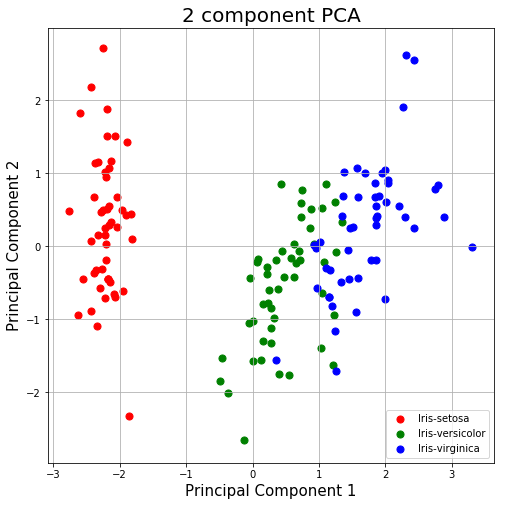

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
print (pca.explained_variance_ratio_)
#So here PC1 explains 72% variance, PC2 explains 23% and rest 5% variance is explained by PC3 and PC4

[0.72770452 0.23030523]


In [16]:
# we can also get the loading scores which tell us how much each variable contibute in the make up of PC1,PC2 etc.
print (pca.components_)


[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
